In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [3]:
consumer_key= 'N7mHCm2vQ12lBsN0Q26aL6kNc'
consumer_secret= 'Ahe5xcbLlrd9lvxmX0f4FDrwLXIbO5dkD1qHmFhca2uwnfaJu4'
access_token= '122730495-dqvUECiBfdeNGCHrzznUlfUcZPqConYHvAkqhlYj'
access_token_secret= 'DStgYNUUlkqUIW3cyxqqTTYu8S8EErmmXs6uH3C7x5ZER'

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [5]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [6]:
# Create a custom search term and define the number of tweets
search_term = "#ndtv+bjp -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2019-01-01').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [7]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.5,
 TextBlob("naqvimukhtar Those who dont trust BJP surely they will trust NDTV hope now they understand its importance st"))

In [8]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.5,
 'naqvimukhtar Those who dont trust BJP surely they will trust NDTV hope now they understand its importance st']

In [9]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.500000,naqvimukhtar Those who dont trust BJP surely t...
1,0.000000,ravishndtv PrannoyRoyNDTV VishnuNDTV NDTV What...
2,0.357143,What was so special in NPRForIndia that Nidhi ...
3,0.350000,ABPNews Then with this logic being Muslim is f...
4,0.000000,If your stories and divide amp rule stunt is o...


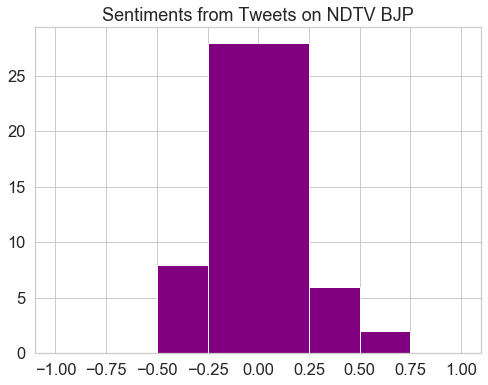

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on NDTV BJP")
plt.show()

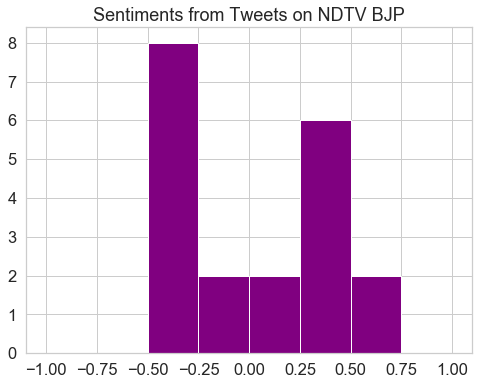

In [13]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on NDTV BJP")
plt.show()

#This plot displays a revised histogram of polarity values for tweets on ndtv BJP. 
#For this histogram, polarity values equal to zero have been removed, and a break has been added at zero,
#to better highlight the distribution of polarity values.

In [31]:
search_term = "#NDTV -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-01-01').items(10000)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]

[TextBlob("After watching Prime Time today ndtv NPRisNRC NPR NDTV"),
 TextBlob("This is the humble request to king Salman to dont take any investment from mukesh ambanijiobecause h"),
 TextBlob("iAnkurSingh ndtv thankses vedio se Kuch log smg Jaye to vese ye log sirf ndtv par hi believe kr te h"),
 TextBlob("FakeNewsMafia is led by NDTV"),
 TextBlob("Jamiat Ulema Darul Uloom Deoband PROTECTED SECRET EXPOSED Pradesh Bhopal Delhi NewDelhi Jaipur Gujarat")]

In [32]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
#wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.count()

polarity    797
tweet       797
dtype: int64

In [33]:
wild_sent_df.to_csv(r"C:\Users\96ank\Notebooks\ndtv.csv")

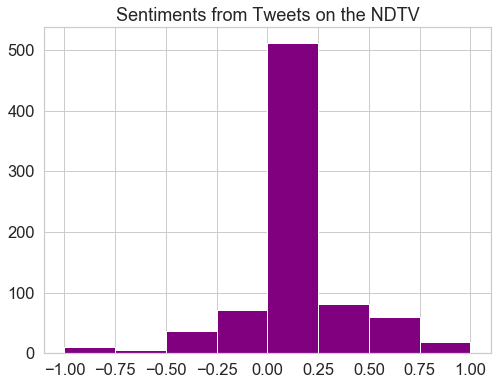

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="purple")

plt.title("Sentiments from Tweets on the NDTV")
plt.show()